### ⚙️ **Mini-exploration: Fenerbahçe Beko Insights (Stage 2 bonus)**

What can I say. I love Fenerbahçe. It's my team.

### 🧩 **Step 1. Load the cleaned players table**

In [2]:
import pandas as pd
from pathlib import Path

CLEAN = Path("clean_data")
players = pd.read_csv(CLEAN / "clean_players.csv", low_memory=False)

print(players.shape)
players.head(3)


(6215, 50)


,season_player_id,season_code,player_id,player,team_id,games_played,games_started,minutes,points,two_points_made,...,total_rebounds_per_game,assists_per_game,steals_per_game,turnovers_per_game,blocks_favour_per_game,blocks_against_per_game,fouls_committed_per_game,fouls_received_per_game,valuation_per_game,plus_minus_per_game
0,E2017_P003733_PAM,E2017,P003733,"ABALDE, ALBERTO",PAM,25.0,9.0,478.5,190,43,...,2.08,1.68,0.32,1.28,0.0,0.20,1.76,1.44,6.88,-0.88
1,E2019_P003733_PAM,E2019,P003733,"ABALDE, ALBERTO",PAM,23.0,4.0,499.3,179,49,...,4.00,1.65,0.48,0.83,0.0,0.35,1.26,1.74,8.91,0.52
2,E2020_P003733_MAD,E2020,P003733,"ABALDE, ALBERTO",MAD,39.0,23.0,761.2,281,47,...,2.67,2.33,0.54,0.97,0.0,0.15,1.54,1.46,8.33,1.05


### 🧩 **Step 2. Look for known Fener players**

We can search by last names or partial strings (case-insensitive).

In [9]:
keywords = ["Bacot", "Horton Tucker", "Jantunen", "Melli", "Wilbekin"]
matches = players[players["player"].str.contains("|".join(keywords), case=False, na=False)]
matches[["season_code", "player", "team_id"]].head(25)


,season_code,player,team_id
262,E2025,"BACOT JR., ARMANDO",ULK
2254,E2025,"HORTON TUCKER, TALEN",ULK
2448,E2024,"JANTUNEN, MIKAEL",PRS
2449,E2025,"JANTUNEN, MIKAEL",ULK
3519,E2010,"MELLI, NICOLO",MIL
3520,E2011,"MELLI, NICOLO",MIL
3521,E2012,"MELLI, NICOLO",MIL
3522,E2013,"MELLI, NICOLO",MIL
3523,E2014,"MELLI, NICOLO",MIL
3524,E2015,"MELLI, NICOLO",BAM


In [10]:
fener_id = matches["team_id"].mode()[0]  # most frequent team_id among those players
print("Fenerbahçe team_id appears to be:", fener_id)

Fenerbahçe team_id appears to be: ULK


### 🧩 **Step 3. Extract all Fenerbahçe games**

Use the ID to filter from the cleaned header or the integrated games_features.csv.

In [11]:
import numpy as np

games = pd.read_csv(CLEAN / "games_features.csv", low_memory=False)

# Helper to pick actual column names in your saved games file
def pick(options):
    for c in options:
        if c in games.columns:
            return c
    return None

TEAM_A = pick(["team_id_a", "home_team_id", "team_a_id"])
TEAM_B = pick(["team_id_b", "away_team_id", "team_b_id"])
SEASON = pick(["season_code", "season"])

assert TEAM_A and TEAM_B, f"Couldn't find team id columns. Available: {games.columns.tolist()}"

fener_id = "ULK"  # from your players table match

# (Optional) focus on latest seasons only
recent_seasons = ["E2025", "E2026"]
if SEASON:
    games_recent = games[games[SEASON].isin(recent_seasons)]
else:
    games_recent = games

# Filter by team_id (ULK) appearing as home or away
fener_games = games_recent[(games_recent[TEAM_A].astype(str) == fener_id) |
                           (games_recent[TEAM_B].astype(str) == fener_id)].copy()

print("Fenerbahçe games found:", len(fener_games))
fener_games.head(3)


Fenerbahçe games found: 3


,game_id,team_id_a,team_id_b,season_code,home_win,home_home_win,home_points,home_assists,home_steals,home_turnovers,...,away_three_points_made,away_three_points_attempted,away_free_throws_made,away_free_throws_attempted,away_total_rebounds,away_valuation,away_fg2_pct,away_fg3_pct,away_ft_pct,away_ast_tov
4644,E2025_008,ULK,PRS,E2025,1,1,192,50,14,32,...,26,62,28,44,86,139,0.300000,0.419355,0.636364,0.628571
4656,E2025_020,ZAL,ULK,E2025,1,1,168,32,10,22,...,12,46,14,20,64,152,0.608696,0.260870,0.700000,1.200000
4666,E2025_030,ULK,RED,E2025,0,0,162,42,10,29,...,12,40,44,66,84,185,0.547619,0.300000,0.666667,1.225806


#### **A quick “shooting % in wins vs losses for Fener” chart:**

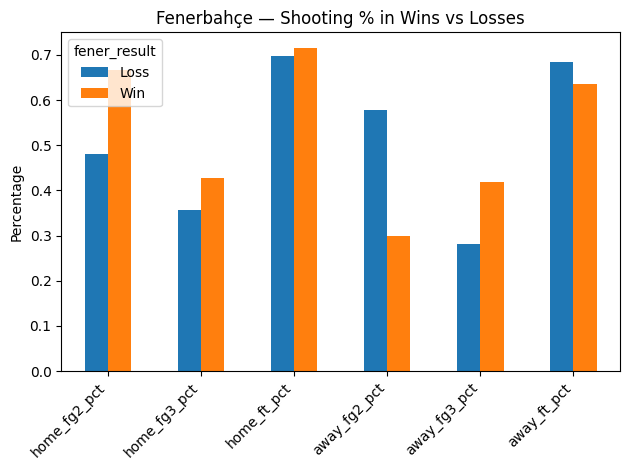

In [16]:
import matplotlib.pyplot as plt

# Determine whether Fener was home or away for each row
fener_games["is_home"] = (fener_games[TEAM_A].astype(str) == fener_id).astype(int)

# Did Fener win? (home_win==1 and Fener home) OR (home_win==0 and Fener away)
fener_games["fener_result"] = np.where(
    ((fener_games["home_win"] == 1) & (fener_games["is_home"] == 1)) |
    ((fener_games["home_win"] == 0) & (fener_games["is_home"] == 0)),
    "Win", "Loss"
)

# Find the available shooting % columns (they may vary)
shoot_cols = [c for c in fener_games.columns if c.endswith("fg2_pct") or c.endswith("fg3_pct") or c.endswith("ft_pct")]

# Compute averages by result
fg_mean = fener_games.groupby("fener_result")[shoot_cols].mean().T

# Simple bar chart
ax = fg_mean.plot(kind="bar")
ax.set_title("Fenerbahçe — Shooting % in Wins vs Losses")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### **2025 Only Filter**

In [17]:
if SEASON:
    fener_2025 = fener_games[fener_games[SEASON] == "E2025"].copy()
    print("Fenerbahçe E2025 games:", len(fener_2025))


Fenerbahçe E2025 games: 3


You can proceed to run the block above for 2025 only

In [39]:
keywords = ["Cedi", "Yurtseven", "Lessort","Richaun","Holmes","Juancho","Hernangomez"]
matches = players[players["player"].str.contains("|".join(keywords), case=False, na=False)]
matches[["season_code", "player", "team_id"]].head(25)


,season_code,player,team_id
2136,E2023,"HERNANGOMEZ, JUANCHO",PAN
2137,E2024,"HERNANGOMEZ, JUANCHO",PAN
2138,E2025,"HERNANGOMEZ, JUANCHO",PAN
2139,E2012,"HERNANGOMEZ, WILLY",MAD
2140,E2015,"HERNANGOMEZ, WILLY",MAD
2141,E2023,"HERNANGOMEZ, WILLY",BAR
2142,E2024,"HERNANGOMEZ, WILLY",BAR
2143,E2025,"HERNANGOMEZ, WILLY",BAR
2243,E2016,"HOLMES, JONATHAN",BAR
2244,E2025,"HOLMES, RICHAUN",PAN


In [40]:
pan_id = matches["team_id"].mode()[0]  # most frequent team_id among those players
print("Panathinaikos team_id appears to be:", pan_id)

Panathinaikos team_id appears to be: PAN
